In [1]:
#Authors: Tlachac, et al
#Paper: "Automated Construction of Lexicons to Improve Depression Screening with Text Messages"

import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

C:\Users\mltla\Anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\mltla\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll
C:\Users\mltla\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
namelist = ["BOW", "Default", 
           "Fiction1c", "Fiction1f", "Fiction1r",
           "Fiction3c", "Fiction3f", "Fiction3r",
           "Fiction5c", "Fiction5f", "Fiction5r",
           "Reddit1c", "Reddit1f", "Reddit1r",
           "Reddit3c", "Reddit3f", "Reddit3r",
           "Reddit5c", "Reddit5f", "Reddit5r",
           "News1c", "News1f", "News1r",
           "News3c", "News3f", "News3r",
           "News5c", "News5f", "News5r",
           "Combined1c", "Combined1f", "Combined1r",
           "Combined3c", "Combined3f", "Combined3r",
            "Combined5c", "Combined5f", "Combined5r"]

methodlist = ["SVC2", "SVC2", 
              "SVC2", "SVC3", "SVC3", 
              "SVC3", "LR1", "SVC2", 
              "SVC3", "LR1", "SVC2", 
              "SVC3", "LR1", "SVC2", 
              "NB", "kNN3", "SVC3", 
              "SVC2", "kNN5", "SVC2",
             "SVC3", "SVC3", "SVC4", 
              "NB", "SVC2", "kNN3",
             "kNN3", "SVC3", "SVC3",
             "NB", "SVC3", "SVC2",
             "SVC2", "SVC3", "kNN3",
             "SVC1", "SVC3", "SVC2",
             "SVC2", "LR1", "LR1"]

split = 10
modelTypelist = ["LR1", "NB", "SVC1", "SVC2", "SVC3", "SVC4", "kNN1", "kNN3", "kNN5"]
score = "F1"

totalaverages = []
bestav = []
bestmodel = []
bestpar = []
bestav2 = []

bestlist = []

for n in range(0, len(namelist)):
    name = namelist[n]
    
    DF = pd.read_csv("results/features" + name + str(split) + ".csv")
            
    resultsDF = DF[(DF.model == methodlist[n]) & (DF.Engineering == "Chi")]

    parameter = 1
    if name == "BOW":
        parameter = 3
    elif name == "reddit5r":
        parameter = 3
            
    bestlist.append(list(resultsDF[resultsDF["nFeatures"] == parameter][score]))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37


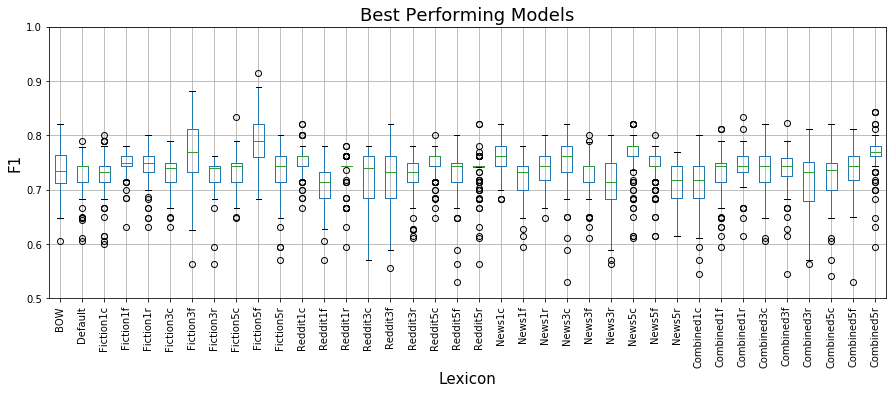

In [3]:
newdf = pd.DataFrame()
for i in range(0, len(namelist)):
    print(i)
    newdf[namelist[i]] = bestlist[i]

plt.figure(figsize = (15, 5))
plt.xlabel("Lexicon", fontsize = 15)
plt.ylabel(score, fontsize = 15)
plt.title("Best Performing Models", fontsize = 18)
newdf.boxplot()
plt.xticks(rotation=90)
plt.ylim(0.5, 1)
plt.savefig("best.png", bbox_inches='tight')
plt.show()
plt.close()